# Project 1  - Melbourne Housing Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

First of all, we load the data from a CSV file into memory in a Pandas Dataframe format. 

In [2]:
df = pd.read_csv('melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


# Q1
How many unique suburbs are there? (2 points)

<!-- BEGIN QUESTION -->



In [3]:
num_unique_suburbs = df["Suburb"].unique()
num_unique_suburbs = num_unique_suburbs.shape[0]
num_unique_suburbs

314

<!-- END QUESTION -->

# Q2
How many unique properties are there?

Unique properties can be identified solely by the address, or GPS coordinates can also be considered.

<!-- BEGIN QUESTION -->



In [4]:
num_unique_properties = len(pd.unique(df['Address']))
num_unique_properties

13378

<!-- END QUESTION -->

# Q3
What is the mean price of a property in the Kensington suburb?


<!-- BEGIN QUESTION -->



In [5]:
mean_price = df.loc[df["Suburb"] == "Kensington" , "Price"].mean()
mean_price

831667.4358974359

<!-- END QUESTION -->

## Q3.1 (extra) 
What is the median price of a property in the Kensington suburb?

<!-- BEGIN QUESTION -->



In [6]:
median_price = df.loc[df["Suburb"]== "Kensington" , "Price"].median()
median_price

812000.0

<!-- END QUESTION -->

# Q4 
What percentage of properties contain a YearBuilt value?

As we see in the table, we do not have for each house the "YearBuild" value and some of them are NaN and not filled. 
We want to find out the percentage of homes that we know their build year. 

<!-- BEGIN QUESTION -->



In [7]:
pct_with_year_built = 100*(len(df['YearBuilt']) - df['YearBuilt'].isna().sum())/len(df['YearBuilt'])
pct_with_year_built

60.41973490427099

<!-- END QUESTION -->

# Q5
Create a histogram plot that shows the data distribution of the Landsizes using 20 bins.

Describe the shape of this histogram plot and your interpretations in one paragraph. 

<!-- BEGIN QUESTION -->



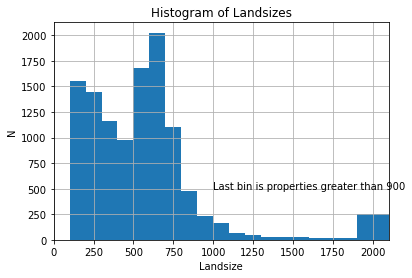

In [8]:
values = df["Landsize"].values
bin_edges = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900, df["Landsize"].max()]
plt.hist(values, bins = bin_edges)
plt.title('Histogram of Landsizes')
plt.xlabel('Landsize')
plt.ylabel('N')
plt.xlim([0,2100])
plt.grid(True)
plt.text(1000, 500, "Last bin is properties greater than 900")
plt.show()

# According to Google: "A histogram is a graph used to represent the frequency distribution 
# of a few data points of one variable. Histograms often classify data into various “bins” 
# or “range groups” and count how many data points belong to each of those bins." So what seems
# to be the case is that there is not a wide range of landsizes. More specifically, almost all 13,580
# data points have a landsize of around 300-700, which is not a wide range for so many data points.
# There is however an outlier that we can find with the max function that has a landsize of around 400,000
# that is heavily skewing the results, grouping the real distribution of the land size into the first bin

<!-- END QUESTION -->

# Q6 
Plot a scatter plot of price as a function of BuildingArea using only rows that have a valid BuildingArea value.

- Create a scatter plot that has BuildingArea as x-axis and Price as y-axis.
- Please make sure your scatter plot is legible, do not let outliers dominate your graph. If you limit/trim/don't show all the data, always inform the reader of the graph of what you have done and what they are viewing.

<!-- BEGIN QUESTION -->



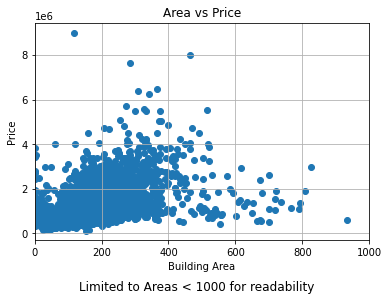

In [9]:
plt.scatter(df['BuildingArea'], df['Price'])
plt.title("Area vs Price")
plt.grid()
plt.xlabel('Building Area')
plt.ylabel('Price')
plt.xlim([0, 1000])
plt.figtext(0.5, -0.05, 'Limited to Areas < 1000 for readability', wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

<!-- END QUESTION -->

# Q7 
Who are the top-10 seller/listing agents? And what percentage of properties they have listed?

Your returned DataFrame should have the following columns:
- SellerG
- Percent
- (You can also leave the counts in if you would like.)

I'm going to assume that the SellerG column is the name of the seller group, so "realtor" in US parlance.  So, that column is interpreted as the seller that listed the property.

<!-- BEGIN QUESTION -->



In [9]:
seller_count = df["SellerG"].to_frame()
ones=np.ones(len(seller_count))
seller_count["Count"] = ones

df_sellers = seller_count.groupby(["SellerG"]).sum()


df_sellers = df_sellers.nlargest(10, "Count")
                                                                                
df_sellers["Percent"] = (df_sellers["Count"] / len(df['SellerG'])) *100

df_sellers

,Count,Percent
SellerG,,
Nelson,1565.0,11.524300
Jellis,1316.0,9.690722
hockingstuart,1167.0,8.593520
Barry,1011.0,7.444772
Ray,701.0,5.162003
Marshall,659.0,4.852725
Buxton,632.0,4.653903
Biggin,393.0,2.893962
Brad,342.0,2.518409


<!-- END QUESTION -->

# Q8 

Fix a problem.

Your boss has told you that the number of rooms (Rooms column) was calculated incorrectly systematically across the entire dataset. To fix this problem, we want to add a room to the Rooms column. (Add 1 room to each row in Rooms column.)

Solve this problem without using a python for loop, and using a single pandas statement. 

Show your output dataset!

<!-- BEGIN QUESTION -->



In [10]:
df_adjusted = df.copy()
df_adjusted['Rooms'] = df_adjusted['Rooms'] + 1
df_adjusted

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,3,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,3,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,4,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,4,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,5,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,5,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,4,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,4,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,5,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


<!-- END QUESTION -->

# Q9 
What is the Address of the earliest built house in this dataset?


<!-- BEGIN QUESTION -->



In [11]:
# df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
# minimum = df["Date"].min()
# address = df.loc[df["Date"] == minimum  , "Address"]
# address

df[df["YearBuilt"] == df["YearBuilt"].min()]["Address"]

9968    5 Armstrong St
Name: Address, dtype: object

<!-- END QUESTION -->

## Q10 
Save a file.

The council member for Melbourne has asked for the information for their district.  Assume that there are legal restrcitions and we can only provide the council member the Suburb, Price, and Date from the CouncilArea "Melbourne" to the council person.  

Export the file with only the allowed columns, and do not write and index column. Pandas automatically adds an index column on the left-most side of the dataframe for easy viewing; do not write this column to the file. Save it as `melb_council_export.csv`.

<!-- BEGIN QUESTION -->



In [12]:
df_melb = df[['Suburb', 'Price', 'Date']]

# Save df_melb to "melb_council_export.csv"
df_melb.to_csv("melb_council_export.csv", index=False)

<!-- END QUESTION -->

